/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


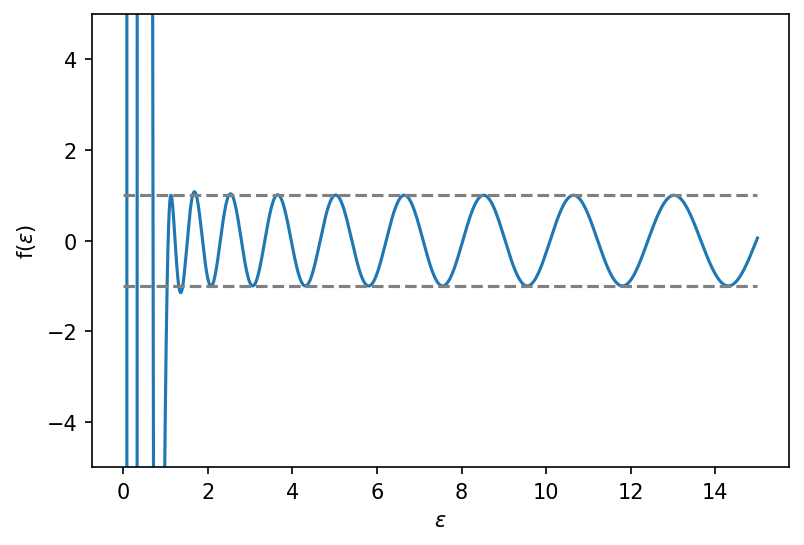

In [ ]:
# На основании модели Кронига-Пени промоделировать зонную структуру одномерного кристалла.
# Проанализировать изменение ширины запрещенных зон для двух
# крайних случаев, когда электрон совершенно свободен и когда электрон заперт внутри одной потенциальной ямы,
# т.е. стенки непроницаемы, а так же
# промежуточные случаи. , где a – ширина ямы, b – ширина барьера, с – постоянная кристаллической решетки.

import matplotlib.pyplot as plt
import numpy as np


a = 5  # ширина ямы
b = 5 # ширина барьера
U0 = 16  # высота барьера
eps_range = 15 # изменение маштаба для отношения потенциальной энергии к высоте барьера

h_bar = 1.054 * 1e-34 # Постоянная Планка
m = 9.109 * 1e-31  # масса электрона в кг
alpha_0 = (2 * m * U0 * 1.602 * 1e-19 / h_bar ** 2) ** (1 / 2)  # коэффициент для нахождения волновой функции

def KPM_p(eps):  # если отношение потенциальной энергии к высоте барьера > 1
    return ((1 - 2 * eps) / (2 * (eps * (eps - 1)) ** (1 / 2)) * np.sin(alpha_0 * a * 1e-10 * eps ** (1 / 2))
            * np.sin(alpha_0 * b * 1e-10 * (eps - 1) ** (1 / 2)) + np.cos(alpha_0 * a * 1e-10 * eps ** (1 / 2))
            * np.cos(alpha_0 * b * 1e-10 * (eps - 1) ** (1 / 2)))


def KPM_m(eps):  # если отношение потенциальной энергии к высоте барьера < 1
    return ((1 - 2 * eps) / (2 * (eps * (1 - eps)) ** (1 / 2))
            * np.sin(alpha_0 * a * 1e-10 * eps ** (1 / 2)) * np.sinh(alpha_0 * b * 1e-10 * (1 - eps) ** (1 / 2))
            + np.cos(alpha_0 * a * 1e-10 * eps ** (1 / 2)) * np.cosh(alpha_0 * b * 1e-10 * (1 - eps) ** (1 / 2)))

if __name__ == '__main__':
    eps_list = np.linspace(0, eps_range, 200000)
    f_eps = np.piecewise(eps_list, [eps_list < 1, eps_list > 1], [KPM_m, KPM_p])

    k_list = np.linspace(0, eps_range, 10)
    k_min = k_list * 0 - 1
    k_max = k_list * 0 + 1

    plt.figure(1, dpi=150)
    plt.xlabel("$\epsilon$")
    plt.ylabel("f($\epsilon$)")
    plt.ylim(-5, 5)
    plt.plot(eps_list, f_eps)
    plt.plot(k_list, k_min, linestyle="dashed", color="grey")
    plt.plot(k_list, k_max, linestyle="dashed", color="grey")

plt.show()
